# **MLPP24 // Assignment 1**

assigned : **Feb 8, 2024**

DUE : **Feb 15, 2024 11:59pm**

## Ridership of Urban Bike Shares: the case of Citi Bike in NYC

![alt text](https://d21xlh2maitm24.cloudfront.net/nyc/01unlock2.JPG?mtime=20160428123800)

---

### OVERVIEW

Bike share programs have been implemented in cities around the world in an effort to address multiple aspects of both city functioning and quality of life for urban populations.  Traffic congestion, public health, community engagement, and air quality have all aspects of city life that could *potentially* be impacted by the introduction of a bike share program into a community.

One particularly massive bike share is New York City's [Citi Bike](https://www.citibikenyc.com/) program.  The area coverage of this program is large (extending into New Jersey across the Hudson River) and ridership initial adoption rates – as measured by the number of rides taken – were promising.  However this program has not been without controversy and there has been active discussion regarding which communities ara actually being served and which are not, who is benefitting from the availability of bikes, how they are being used for recreational vs commuter purposes, etc.

The goal of this assignment is two-fold: first, you will learn to work with basic tabular data from the Citi Bike program and second, you will generate a simple estimate for the <u>which age group is predominantly using citi bikes for commuter travel</u>.

<br>

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.


Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do you must answer YES to the question below and bear in mind that such models <u>often</u> yield incorrect and biased solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

**Did you use a generative AI model (e.g., ChatGPT) to create text or code for this assignment?**

Yes. Used ChatGPT mostly for syntaxs.

---

### **PART 1 - Background**

Good data science (and data analysis more generally) as well as the appropriate application of machine learning algorithms depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>

Read through the following resources (including links within) regarding the Citi Bike program and its impacts in NYC,

1. [official Citi Bike site](https://citibikenyc.com/)

2. [DOT Facts on Citi Bike](https://www.nyc.gov/html/dot/html/pr2013/facts-on-citi-bike.shtml)

3. [Cycling in the City](https://www.nyc.gov/html/dot/downloads/pdf/cycling-in-the-city-2020.pdf)

4. [The Rise of Citi Bikes in New York City](https://thesciencesurvey.com/news/2021/03/21/the-rise-of-citi-bikes-in-new-york-city/)

</b>

### **PART 2 - Loading the data**

First things first, let's get access to the data.  To do that, we need to link this notebook with out Google Drive.  On the left there is a folder icon.  **Click that and in the popout menu click "Mount Drive" (i.e., the folder with the Google Drive icon).**  This will create a cell of code for you to run.  **Follow the instructions to link this notebook with your Google Drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In the menu on the left, **click the `drive` folder <small>(nb., you may need to click the folder with the refresh icon to see your `drive` folder)</small>, then `Shareddrives`, then locate the shared `mlpp24` directory**.  Inside of that is a directory called `data` and inside that is a directory called `citibike`.  In that folder is the citibike data.  **Right click on the file and select "copy path".  Put that path to the file into a string variable called `fname` and use pandas `read_csv()` function to load the data (no need to skip rows) into a pandas DataFrame called `citi`.**

In [ ]:
fname = "/content/drive/Shareddrives/mlpp24/data/citibike/JC-201604-citibike-tripdata.csv"
citi = pd.read_csv(fname)

### **PART 3 - Calculate useful metrics**

Our end goal is to get an estimate of what age riders are using citi bikes for commuter travel the most.  <u>We're going to do that by separating the trips into short and long trips and then finding the age that has the highest fraction of short trips.</u>

Let's convert a couple columns of data into some quantities that will be useful in our model below.

First, use the values from the `"Birth Year"` column to **calculate the age of the rider.  Add those values as a column called "age" in your `citi` DataFrame**.

In [ ]:
age = 2024 - citi['Birth Year']
citi['age'] = age

Now, extract the `"Trip Duration"` column (the units of which are seconds) and **take the logarithm of those using numpy's `log10()` function$^{\dagger}$.  Put them into a column in `citi` called "logdur".**

<i><small>$^{\dagger}$ recall that log10(x) = y where 10<sup>y</sup> = x, so if a trip duration is `t` = 100 seconds, `np.log10(t)` = 2 since 10<sup>2</sup> = 100.</small>

In [ ]:
logdur = np.log10(citi['Trip Duration'])
citi['logdur'] = logdur

### **PART 4 - Visualize the data and update metrics**

Since we're interested in trip durations, **use `citi`'s `.hist()` method to plot a histogram of the `"Trip Duration"` column of the data setting the range from 0 to 10000 seconds and using 100 bins**.

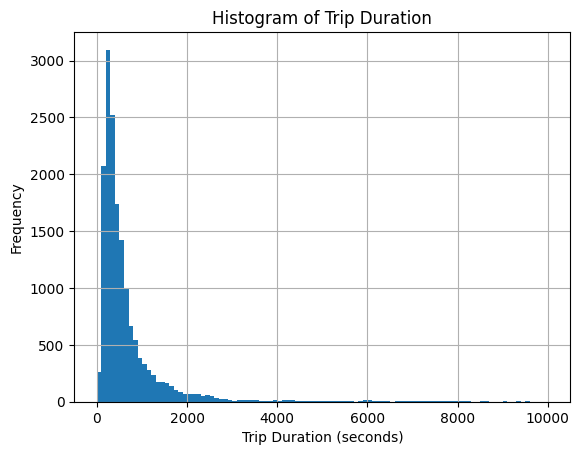

In [ ]:
citi['Trip Duration'].hist(range=[0, 10000], bins=100)

plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration')

plt.show()


**Would you characterize this distribution as "Gaussian"?  Why or why not?**

I donot characterize this distribution as 'Gaussian'. It is not bell shaped and it is looking more of 'Skewed' Distributed.

Now, **plot a histogram with 100 bins (no need to set the range) of the logarithm of the trip durations that you calculated above**.

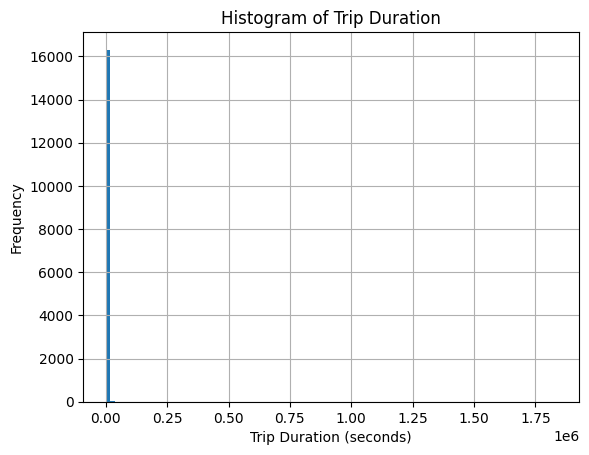

In [ ]:
citi['Trip Duration'].hist(bins=100)

plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration')

plt.show()

**Would you characterize this distribution as Gaussian?  Why or why not?**

I donot characterize this distribution as Gaussian. It doest not look like bell shaped. It is neither skewed as before one.

The previous plot might give you a sense for how to break up the rides into "short" and "long" rides (which we'll use as a proxy for "commuter" and "recreational" respectively).  **Calculate the median of the logarithm of the trip duration.**

In [ ]:
median_logdur = citi['logdur'].median()

print("The Median of the logarithm of trip duration: ", median_logdur)

The Median of the logarithm of trip duration:  2.6138418218760693


We'll use this as the short/long dividing line.  **What is the duration of this trip in minutes?  Does that seem like a resonable time for commuting?  How far would you get in that time biking at 10 mph (and is that a reasonable biking speed)?**

Duration of the trip in minutes is 6.8500000000000005. Yes, it seems like a resonable time for commuting. Distance covered biking in is 1.1416666666666668 miles


In [ ]:
# The duration of the trip in minutes
dur_min = (10 ** median_logdur)/60

# Given speed is 10 mph(milles per hour)
speed = 10
distance_covered = speed * (dur_min / 60)

print("Duration of the trip in minutes:", dur_min)
print("Distance covered biking in miles is :", distance_covered)

Duration of the trip in minutes: 6.8500000000000005
Distance covered biking in miles is : 1.1416666666666668


**Add two columns to your `citi` dataframe: a column called `"short_trip"` that is `True` when the trip duration is less than dividing line above and `False` otherwise, and a column called "long_trip" that is `True` when the duration is greater than or equal to the dividing line above but `False` otherwise.**

In [ ]:
# Calculate the duration of the trip in seconds based on the median of the logarithm of trip duration
dividing_line = 10 ** median_logdur

# Add columns "short_trip" and "long_trip" to the DataFrame
citi['short_trip'] = citi['Trip Duration'] < dividing_line
citi['long_trip'] = citi['Trip Duration'] >= dividing_line

Now, we're going to use a pandas dataframe trick that is quite useful (and related to similar functionality in other data analysis software) to "group" the data "by" the age using `citi`'s `.groupby()` method.  It also needs a function to perform on the groups which outputs another data frame.  If you've accomplished the above correctly, this line of code should execute without an error:

In [ ]:
citig = citi.groupby("age").sum()

<ipython-input-77-4a32405d67bf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  citig = citi.groupby("age").sum()


This new dataframe should now have an index that is the age groups and two columns (called "short_trip" and "long_trip") that are the sums of short and long trips for that age group.  **Get the total number of trips for that age group by adding those together.**

In [ ]:
citig['total_trips'] = citig['short_trip'] + citig['long_trip']

# Display the total number of trips for each age group
print(citig[['total_trips']])

      total_trips
age              
25.0            5
26.0            9
27.0            1
28.0           35
29.0           24
30.0           99
31.0          107
32.0          220
33.0          558
34.0          594
35.0          555
36.0          395
37.0          621
38.0          913
39.0          777
40.0          822
41.0          637
42.0          503
43.0          920
44.0          667
45.0          508
46.0          469
47.0          620
48.0          564
49.0          295
50.0          193
51.0          206
52.0          355
53.0          186
54.0          316
55.0          212
56.0          323
57.0          247
58.0           83
59.0          119
60.0          196
61.0          116
62.0          214
63.0           66
64.0          155
65.0           81
66.0           82
67.0           46
68.0          193
69.0           62
70.0           95
71.0            6
72.0           22
73.0           35
74.0           23
75.0           12
76.0            7
77.0           10
78.0      

**Plot the fraction of trips that are short as a function of age group.**$^{\dagger}$

<small>$^{\dagger}$ you can access the index values of a dataframe like so: `age_group = citig.index`</small>

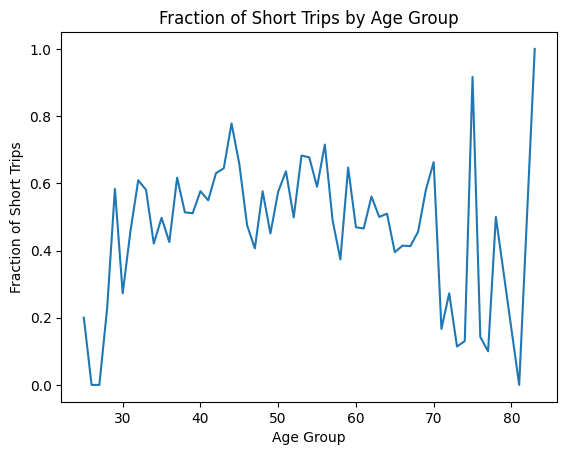

In [ ]:
citig['fraction_short'] = citig['short_trip'] / citig['total_trips']

# Plot the fraction of short trips as a function of age group
plt.plot(citig.index, citig['fraction_short'])

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Fraction of Short Trips')
plt.title('Fraction of Short Trips by Age Group')

# Show the plot
plt.show()


**What is the age group that is predominantly using citi bikes for commuting?  How did you make that determination?**

 The age group that is predominantly using citi bikes for commuting is **83** because the fraction of short time is 1.

**What are the assumptions that went into finding this model?  And how do your findings relate to the information in the resources in Part 1?**

The assumptions that went into finding this model are, we assume that short trips are for commuting and we also neglect the reason of biking and day of the week(especially weekends).
The model looks like a parobola and also the information in the resources suggest that mid age people are cycling often after Covid.

### **EXTRA CREDIT - Fit a model parameter by hand (aka: "fit by eye")**

Let's approximate the number of short trips as a function of age group by a parabola.  Here's the function we'll use:

In [ ]:
def short_by_age(age_groups, peak_age, peak_value):
  """
  Generate a model for the fraction of trips that are short as a
  function of age group.
  """

  model = -6e-4 * (age_groups - peak_age)**2 + peak_value

  return model

**Use the above function to fit the `peak_age` and `peak_value` parameters "by eye".**  By that I mean, choose some values, plot it, chose a new value and plot it to see if it fits better by eye, then repeat until you have something that looks reasonable.

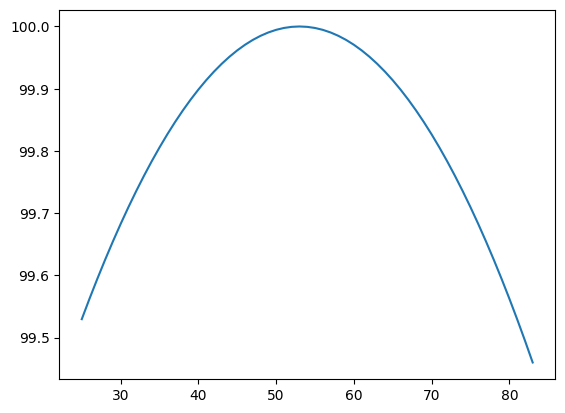

In [ ]:
y = []
peak_age = 53
peak_value = 100
age_groups = range(25, 84)
for i in age_groups:
  y.append(short_by_age(i, peak_age, peak_value))
plt.plot(age_groups, y)